## Menjalankan data tempat wisata

### Declaration of Library


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

### Upload dataset

In [ ]:
## Code ambil melalui file pribadi
from google.colab import files
uploaded = files.upload()

Saving lokis.csv to lokis (4).csv


Kalau mau ambil dataset lewat link github bisa pakai code dibawah ini


### Load dataset

In [ ]:
## Load Dataset ulang nama file tourism

df = pd.read_csv('lokis (4).csv')
df

,no,name,category,city,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi
0,1,Tribeca Park,park,Jakarta,"Letjen S. Parman No.28, RT.12/RW.6, Tj. Duren ...",ChIJOQcPe1_2aS4RodErUdz2cfc,4.7,0,24 hours,-6.177251,106.790470,17,https://www.google.com/maps/search/?api=1&quer...,1,https://firebasestorage.googleapis.com/v0/b/lo...,Tribeca Park merupakan area terbuka ramai yang...
1,2,Museum Perangko Indonesia,museum,Jakarta,"MWW2+8PC, Taman Mini Indonesia Indah, Jalan Ta...",ChIJPaQs81DtaS4RGVitRjnxIZQ,4.5,5000,08.00 am - 04.00 pm,-6.304184,106.901773,43,https://www.google.com/maps/search/?api=1&quer...,2,https://firebasestorage.googleapis.com/v0/b/lo...,Kompleks museum filateli yang mengeksplorasi s...
2,3,Museum Layang-layang Indonesia,museum,Jakarta,"Jl. H. Kamang No.38, RT.8/RW.10, Pd. Labu, Kec...",ChIJjzzUACDuaS4Rc_mZHqCBRbA,4.5,15000,09.00 am - 04.00 pm,-6.307985,106.790585,39,https://www.google.com/maps/search/?api=1&quer...,3,https://firebasestorage.googleapis.com/v0/b/lo...,Museum Layang-Layang Indonesia adalah sebuah m...
3,4,Hutan Kota Srengseng,tourist_attraction,Jakarta,"Jl. H. Kelik, RT.8/RW.6, Srengseng, Kec. Kemba...",ChIJE7YGNy_3aS4RrCeV3DO5qhE,4.4,4000,07.00 am - 05.00 pm,-6.210694,106.764395,27,https://www.google.com/maps/search/?api=1&quer...,4,https://firebasestorage.googleapis.com/v0/b/lo...,Taman alam perkotaan yang luas dengan jalan se...
4,5,Wisata Kota Tua Jakarta,tourist_attraction,Jakarta,"Kawasan Kota Tua, Taman Fatahillah No.1, RT.7/...",ChIJ7RcAlCrsaS4RM4GToNQSzt8,4.6,5000,08.00 am - 09.00 pm,-6.135069,106.813680,26,https://www.google.com/maps/search/?api=1&quer...,5,https://firebasestorage.googleapis.com/v0/b/lo...,"Kota tua Jakarta, Kota Tua berpusat di Alun-Al..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,243,Taman Jajan Cikunir,tourist_attraction,Bekasi,"Jl. Cikunir Raya No.88, RT.002/RW.003, Jaka Mu...",ChIJb7Zc6b6NaS4RX1FmWU1NNZ0,4.5,5000,09.00 am - 23.00 pm,-6.272262,106.962166,52,https://www.google.com/maps/search/?api=1&quer...,242,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Jajan Cikunir merupakan sebuah tempat ma...
237,244,Al-Barkah Bekasi Great Mosque,mosque,Bekasi,"Masjid Al - Barkah, Jl. Veteran No.46, RT.003/...",ChIJe6y_wSWMaS4RXpaow-yK2_A,4.8,0,24 hours,-6.240764,106.999540,49,https://www.google.com/maps/search/?api=1&quer...,243,https://firebasestorage.googleapis.com/v0/b/lo...,"Masjid yang dibangun pada era Hindia-Belanda, ..."
238,246,Permainan anak alamanda regency,tourist_attraction,Bekasi,"Jl. Alamanda Regency Raya, Karangsatria, Kec. ...",ChIJlVul64iPaS4RQZXD-Z0RcZ0,5.0,20000,07.30 am - 11.00 pm,-6.226594,107.045138,66,https://www.google.com/maps/search/?api=1&quer...,245,https://firebasestorage.googleapis.com/v0/b/lo...,Arena permainan anak-anak yang menyenangkan.
239,247,Jatusumbi,tourist_attraction,Bekasi,"Kp Payangan RT 006, RT.012/RW.008, Jatisari, K...",ChIJ78OzxrGTaS4R1QaWjFQ-fOY,4.5,0,07.00 am - 06.00 pm,-6.351069,106.949539,75,https://www.google.com/maps/search/?api=1&quer...,246,https://firebasestorage.googleapis.com/v0/b/lo...,Destinasi wisata air.


### Exploratory Data Analysis (EDA)

In [ ]:
#Checking the shape of the file
df.shape

(241, 16)

In [ ]:
df.columns

Index(['no', 'name', 'category', 'city', 'address', 'place_id', 'rating',
       'price', 'open hours', 'latitude', 'longitude', 'time_minutes', 'maps',
       'user_id', 'url', 'deskripsi'],
      dtype='object')

In [ ]:
# Informasi umum mengenai data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no            241 non-null    int64  
 1   name          241 non-null    object 
 2   category      241 non-null    object 
 3   city          241 non-null    object 
 4   address       241 non-null    object 
 5   place_id      241 non-null    object 
 6   rating        241 non-null    float64
 7   price         241 non-null    int64  
 8   open hours    241 non-null    object 
 9   latitude      241 non-null    float64
 10  longitude     241 non-null    float64
 11  time_minutes  241 non-null    int64  
 12  maps          239 non-null    object 
 13  user_id       241 non-null    int64  
 14  url           241 non-null    object 
 15  deskripsi     241 non-null    object 
dtypes: float64(3), int64(4), object(9)
memory usage: 30.2+ KB


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects

,name,category,city,address,place_id,open hours,maps,url,deskripsi
0,Tribeca Park,park,Jakarta,"Letjen S. Parman No.28, RT.12/RW.6, Tj. Duren ...",ChIJOQcPe1_2aS4RodErUdz2cfc,24 hours,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Tribeca Park merupakan area terbuka ramai yang...
1,Museum Perangko Indonesia,museum,Jakarta,"MWW2+8PC, Taman Mini Indonesia Indah, Jalan Ta...",ChIJPaQs81DtaS4RGVitRjnxIZQ,08.00 am - 04.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Kompleks museum filateli yang mengeksplorasi s...
2,Museum Layang-layang Indonesia,museum,Jakarta,"Jl. H. Kamang No.38, RT.8/RW.10, Pd. Labu, Kec...",ChIJjzzUACDuaS4Rc_mZHqCBRbA,09.00 am - 04.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Museum Layang-Layang Indonesia adalah sebuah m...
3,Hutan Kota Srengseng,tourist_attraction,Jakarta,"Jl. H. Kelik, RT.8/RW.6, Srengseng, Kec. Kemba...",ChIJE7YGNy_3aS4RrCeV3DO5qhE,07.00 am - 05.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Taman alam perkotaan yang luas dengan jalan se...
4,Wisata Kota Tua Jakarta,tourist_attraction,Jakarta,"Kawasan Kota Tua, Taman Fatahillah No.1, RT.7/...",ChIJ7RcAlCrsaS4RM4GToNQSzt8,08.00 am - 09.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,"Kota tua Jakarta, Kota Tua berpusat di Alun-Al..."
...,...,...,...,...,...,...,...,...,...
236,Taman Jajan Cikunir,tourist_attraction,Bekasi,"Jl. Cikunir Raya No.88, RT.002/RW.003, Jaka Mu...",ChIJb7Zc6b6NaS4RX1FmWU1NNZ0,09.00 am - 23.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Jajan Cikunir merupakan sebuah tempat ma...
237,Al-Barkah Bekasi Great Mosque,mosque,Bekasi,"Masjid Al - Barkah, Jl. Veteran No.46, RT.003/...",ChIJe6y_wSWMaS4RXpaow-yK2_A,24 hours,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,"Masjid yang dibangun pada era Hindia-Belanda, ..."
238,Permainan anak alamanda regency,tourist_attraction,Bekasi,"Jl. Alamanda Regency Raya, Karangsatria, Kec. ...",ChIJlVul64iPaS4RQZXD-Z0RcZ0,07.30 am - 11.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Arena permainan anak-anak yang menyenangkan.
239,Jatusumbi,tourist_attraction,Bekasi,"Kp Payangan RT 006, RT.012/RW.008, Jatisari, K...",ChIJ78OzxrGTaS4R1QaWjFQ-fOY,07.00 am - 06.00 pm,https://www.google.com/maps/search/?api=1&quer...,https://firebasestorage.googleapis.com/v0/b/lo...,Destinasi wisata air.


In [ ]:
## Ubah type data dari object ke category
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   no            241 non-null    int64   
 1   name          241 non-null    category
 2   category      241 non-null    category
 3   city          241 non-null    category
 4   address       241 non-null    category
 5   place_id      241 non-null    category
 6   rating        241 non-null    float64 
 7   price         241 non-null    int64   
 8   open hours    241 non-null    category
 9   latitude      241 non-null    float64 
 10  longitude     241 non-null    float64 
 11  time_minutes  241 non-null    int64   
 12  maps          239 non-null    category
 13  user_id       241 non-null    int64   
 14  url           241 non-null    category
 15  deskripsi     241 non-null    category
dtypes: category(9), float64(3), int64(4)
memory usage: 79.6 KB


In [ ]:
# Statistik deskriptif untuk kolom-kolom numerik
df.describe(include='all')

,no,name,category,city,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi
count,241.000000,241,241,241,241,241,241.000000,241.000000,241,241.000000,241.000000,241.000000,239,241.000000,241,241
unique,NaN,239,9,5,239,239,NaN,NaN,56,NaN,NaN,NaN,226,NaN,241,239
top,NaN,Cisadane Walk,tourist_attraction,Jakarta,"RJHH+29Q, Sepanjang, Jl. Benteng Jaya, RT.004/...",ChIJ5-ChDU_5aS4RZkVKmB9VV_k,NaN,NaN,24 hours,NaN,NaN,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN,https://firebasestorage.googleapis.com/v0/b/lo...,Kawasan pejalan kaki tepi laut dengan papan wa...
freq,NaN,2,149,51,2,2,NaN,NaN,71,NaN,NaN,NaN,5,NaN,1,2
mean,122.556017,NaN,NaN,NaN,NaN,NaN,4.480913,18751.037344,NaN,-6.335588,106.813132,69.979253,NaN,122.419087,NaN,NaN
std,71.425938,NaN,NaN,NaN,NaN,NaN,0.324758,34622.702225,NaN,0.157325,0.133221,37.807787,NaN,71.219575,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,2.700000,0.000000,NaN,-6.707445,106.397983,4.000000,NaN,1.000000,NaN,NaN
25%,61.000000,NaN,NaN,NaN,NaN,NaN,4.400000,0.000000,NaN,-6.413387,106.745996,47.000000,NaN,61.000000,NaN,NaN
50%,121.000000,NaN,NaN,NaN,NaN,NaN,4.500000,5000.000000,NaN,-6.303900,106.805267,61.000000,NaN,121.000000,NaN,NaN
75%,184.000000,NaN,NaN,NaN,NaN,NaN,4.600000,25000.000000,NaN,-6.198734,106.893327,80.000000,NaN,184.000000,NaN,NaN


In [ ]:
# Memeriksa missing values
df.isnull().sum()

no              0
name            0
category        0
city            0
address         0
place_id        0
rating          0
price           0
open hours      0
latitude        0
longitude       0
time_minutes    0
maps            2
user_id         0
url             0
deskripsi       0
dtype: int64

In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True]

(241, 16)
jumlah data yang duplikat 0


,no,name,category,city,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi


<Axes: >

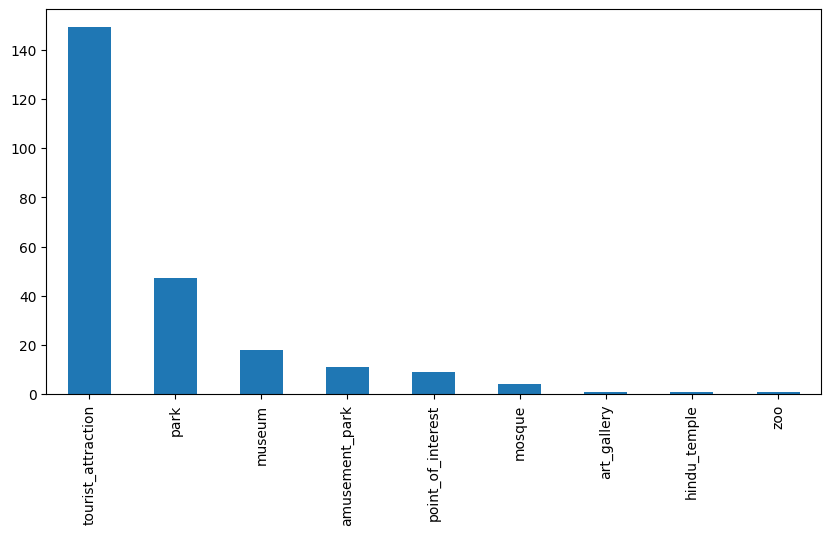

In [ ]:
# Genre distribution
df['category'].value_counts().plot(x = 'category', y ='count', kind = 'bar', figsize = (10,5))


<Axes: >

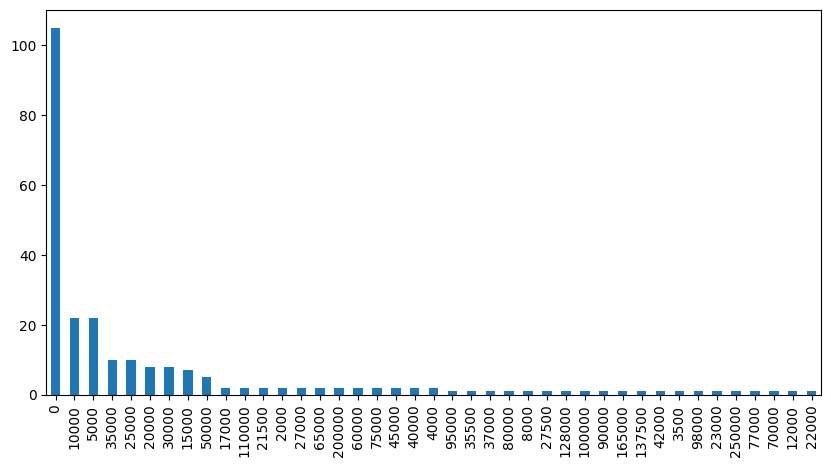

In [ ]:
# Genre distribution
df['price'].value_counts().plot(x = 'price', y ='count', kind = 'bar', figsize = (10,5))

<Axes: >

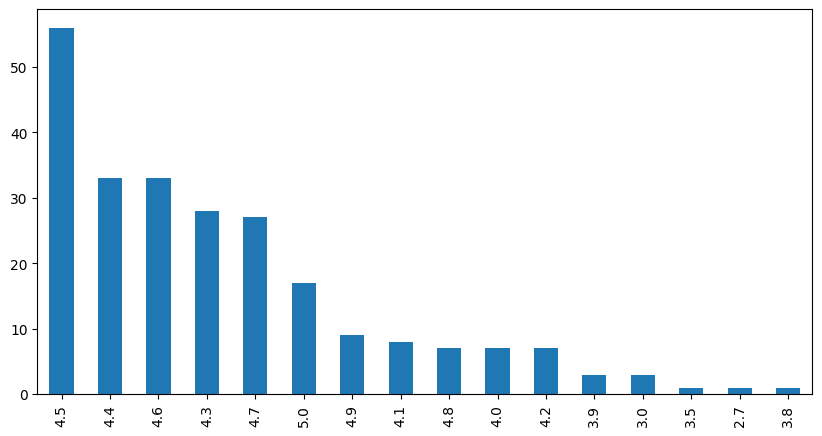

In [ ]:
# Genre distribution
df['rating'].value_counts().plot(x = 'rating', y ='count', kind = 'bar', figsize = (10,5))

<Axes: >

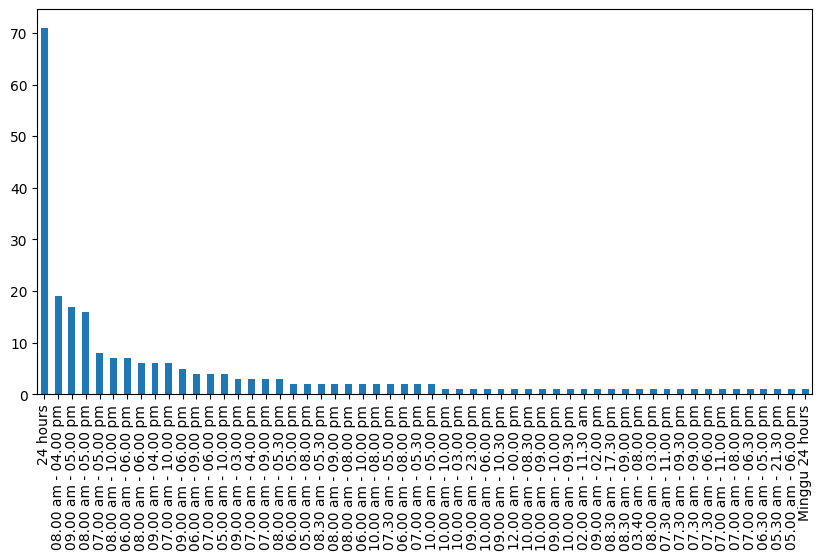

In [ ]:
# Genre distribution
df['open hours'].value_counts().plot(x = 'open hours', y ='count', kind = 'bar', figsize = (10,5))

In [ ]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz
# Visual Python: Data Analysis > Sweetviz
import sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 47.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


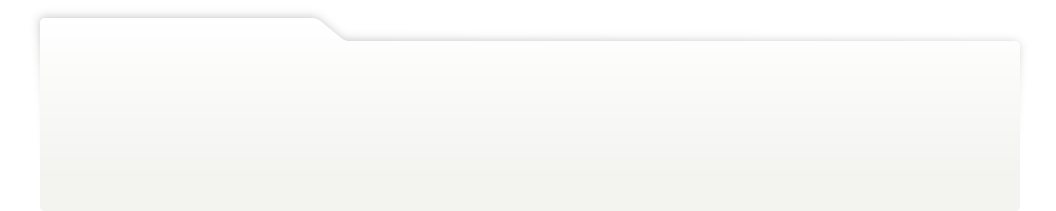
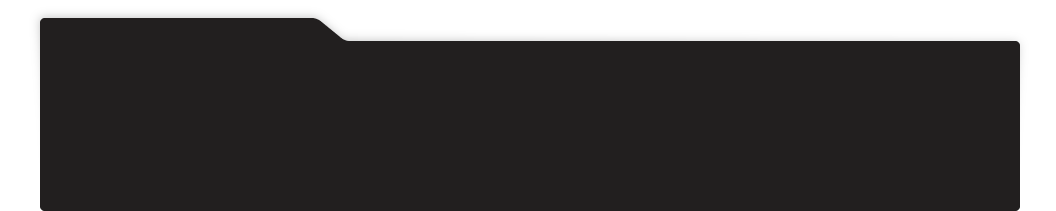
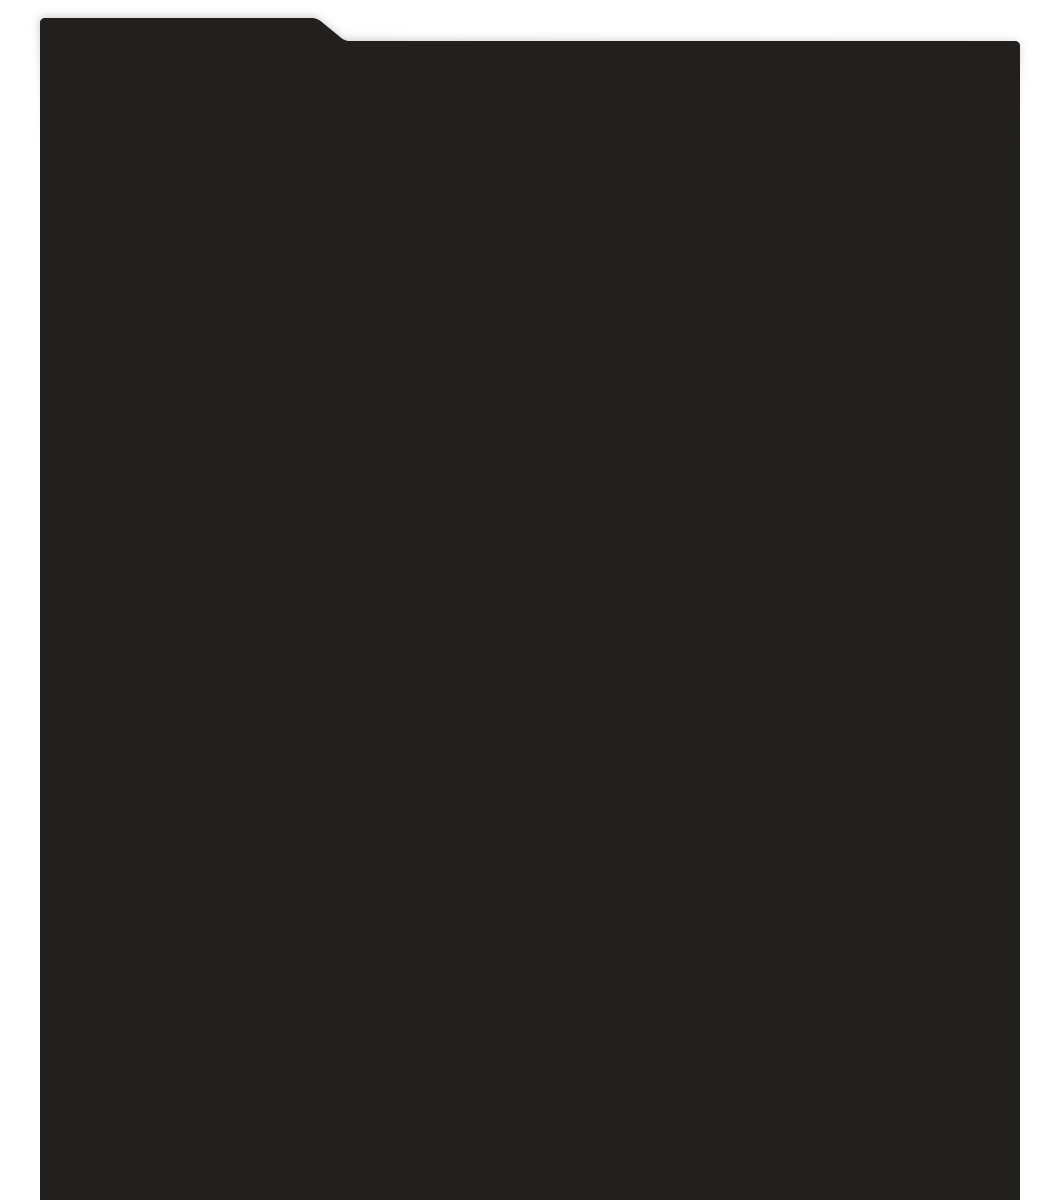
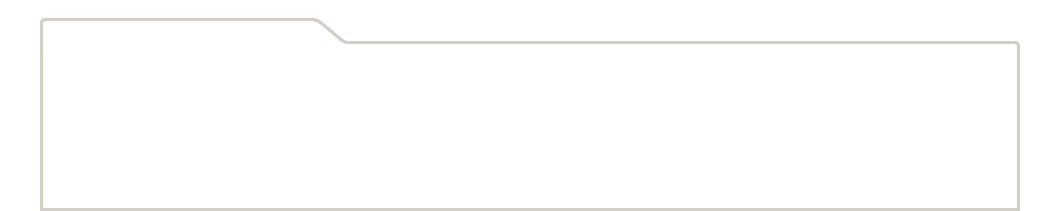
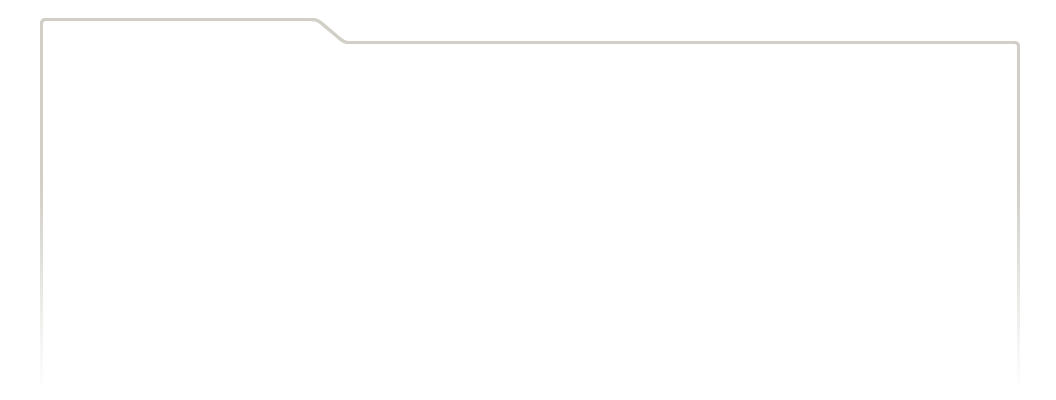
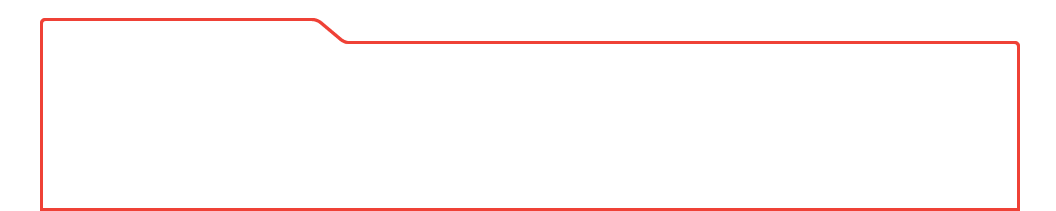
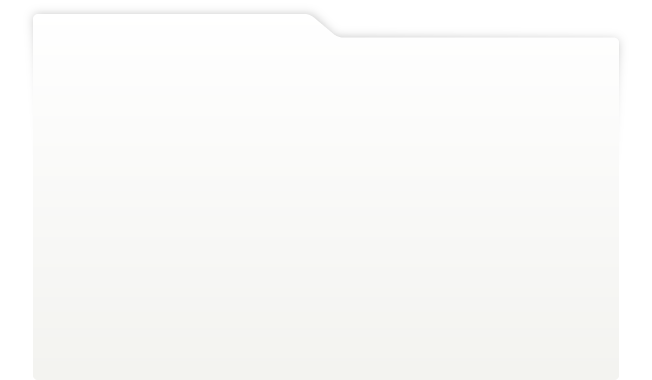
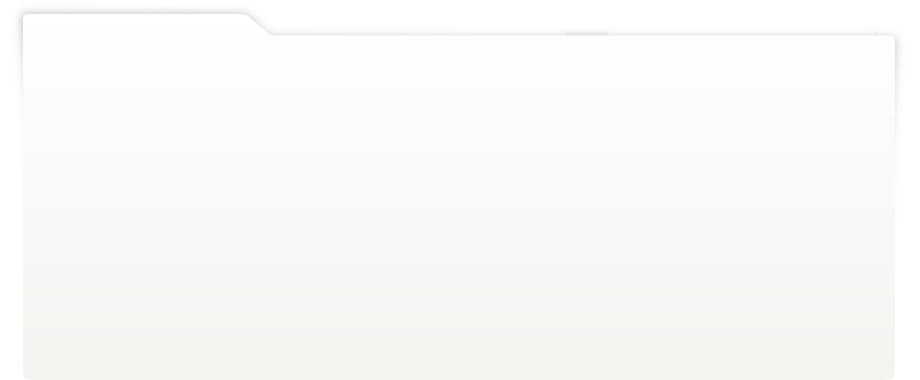
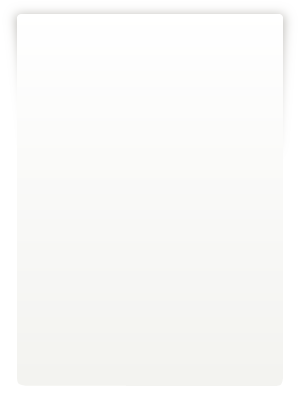
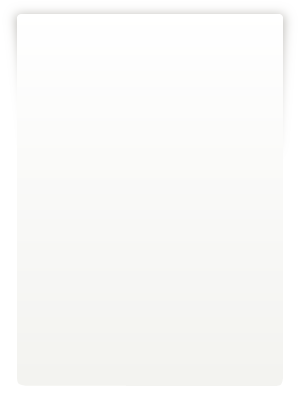
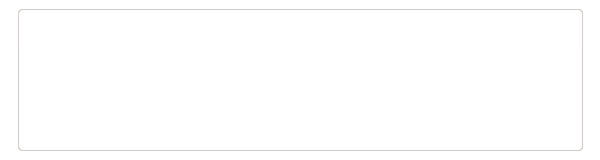
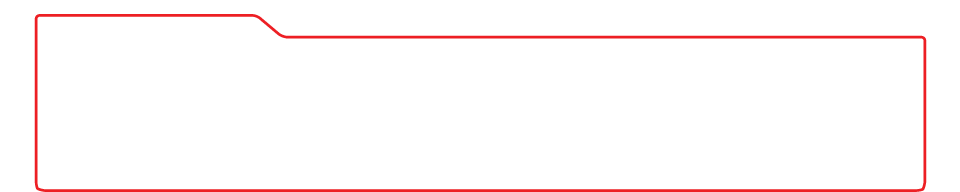
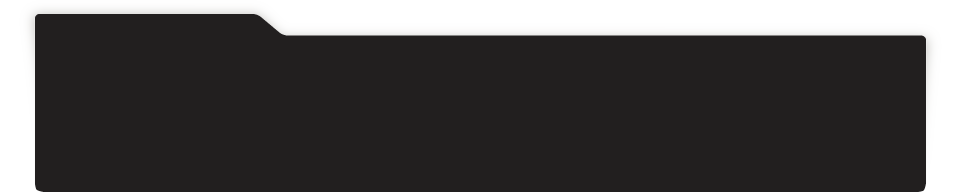
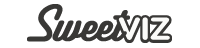
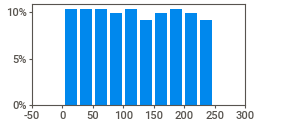
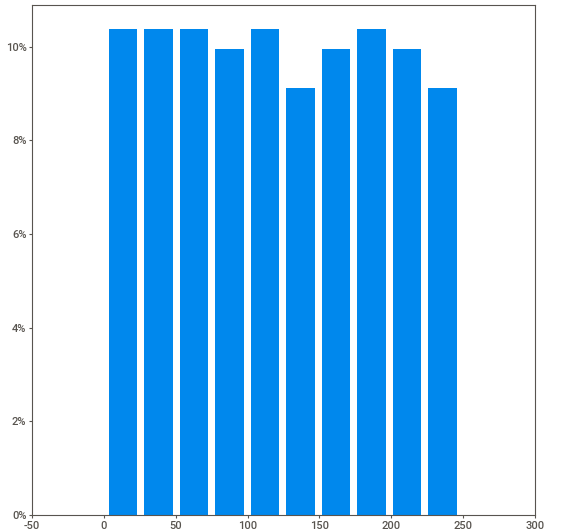
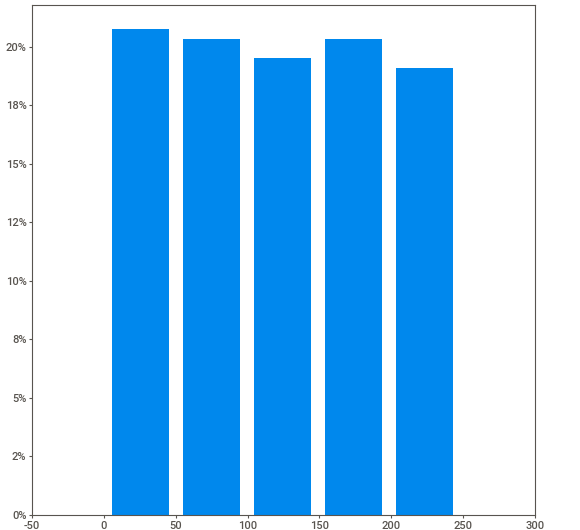
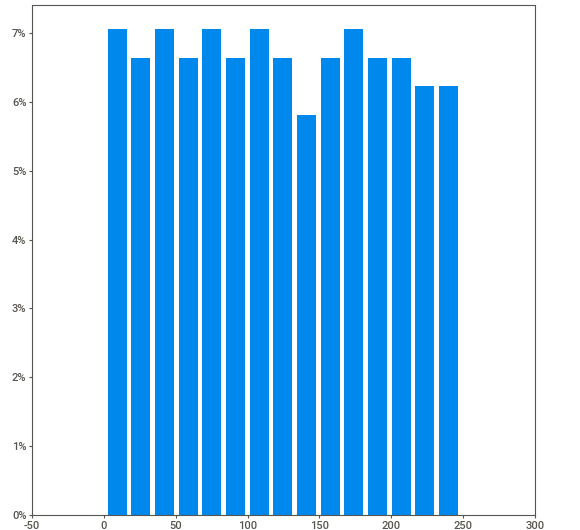
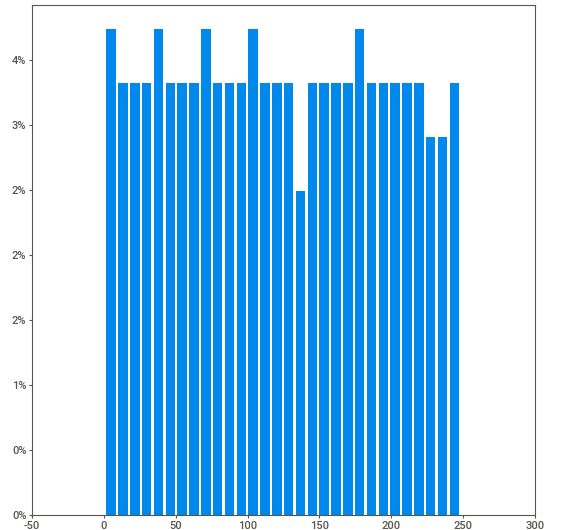
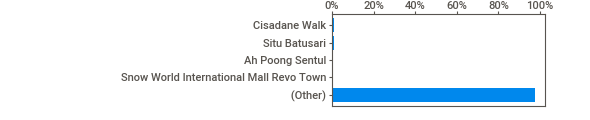
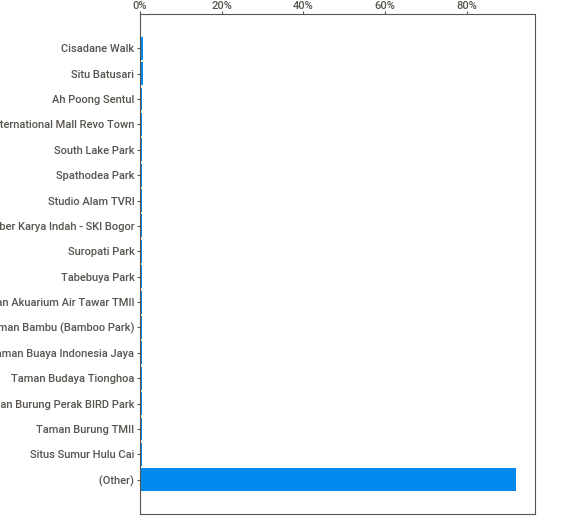
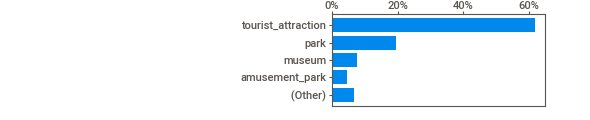
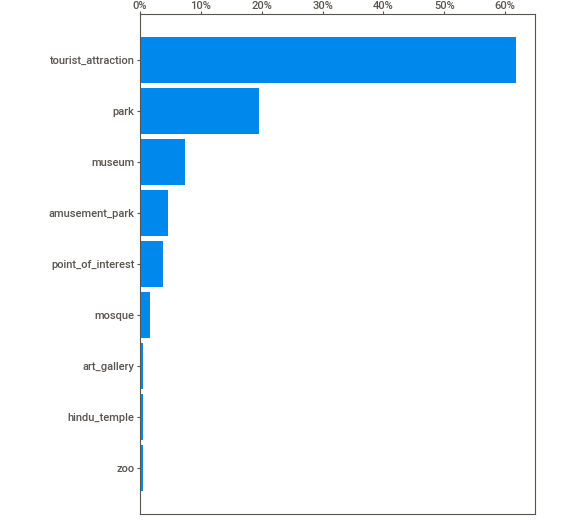
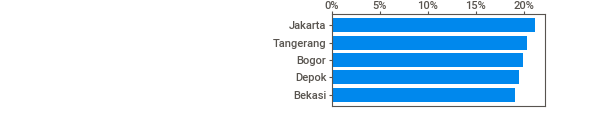
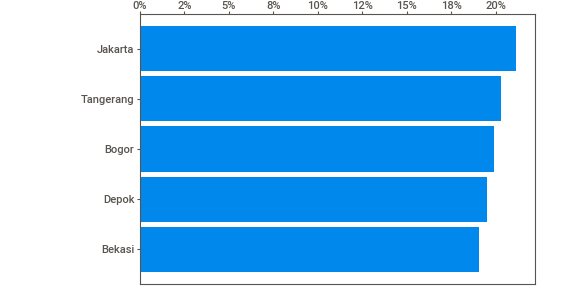
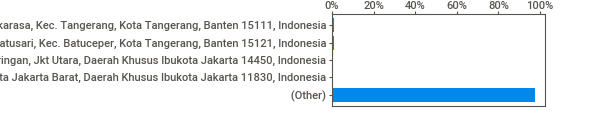
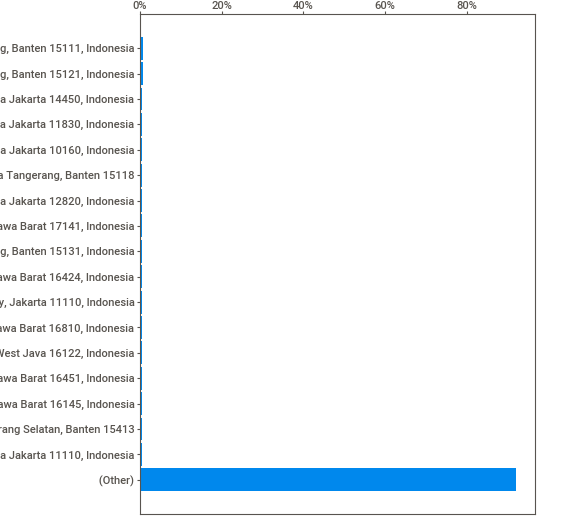
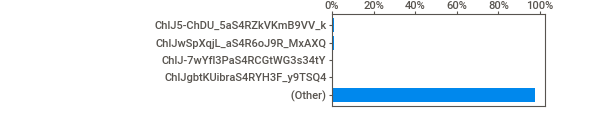
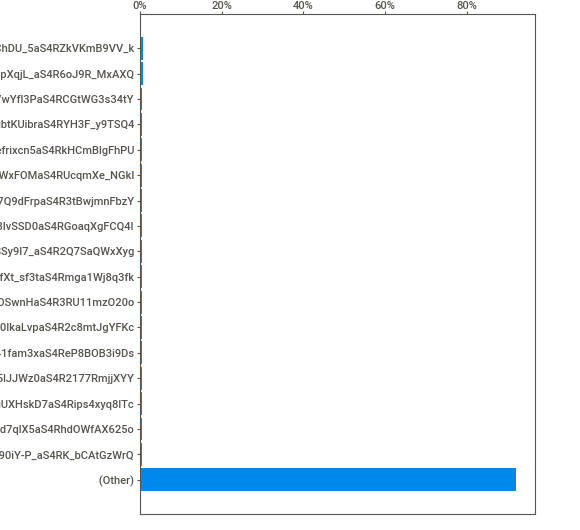
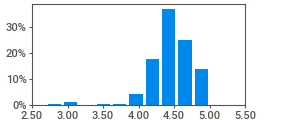
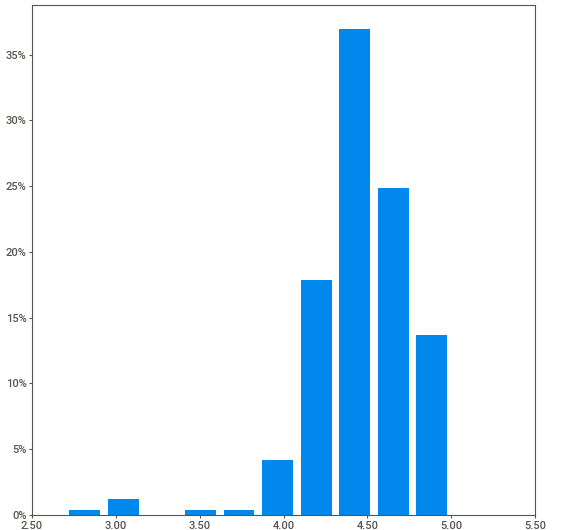
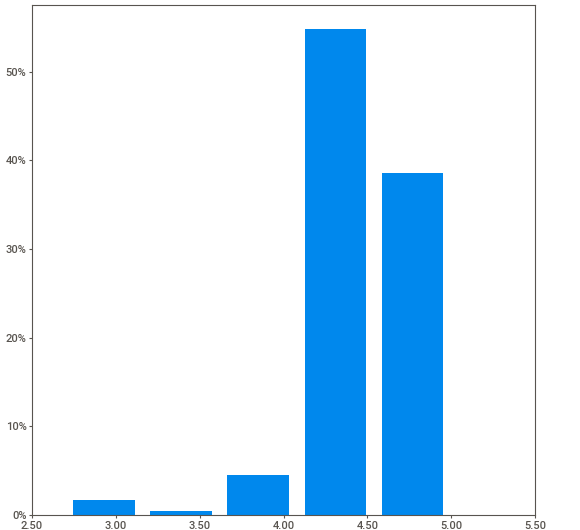
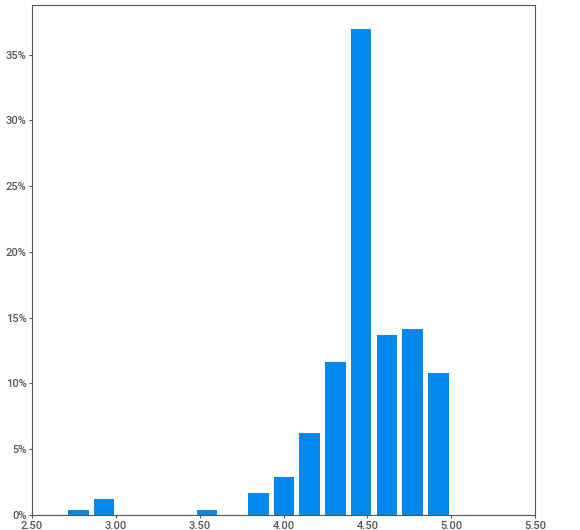
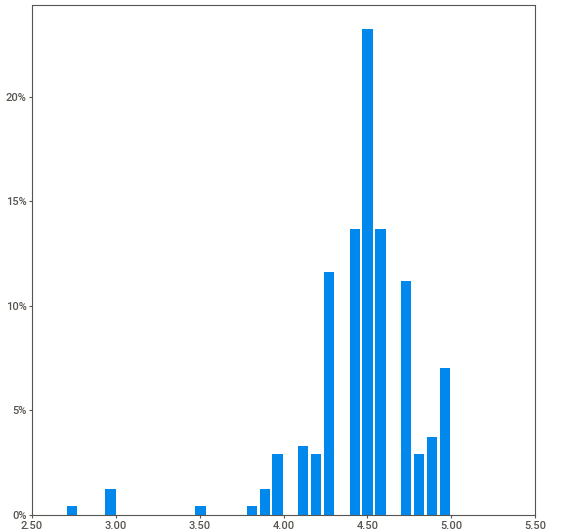
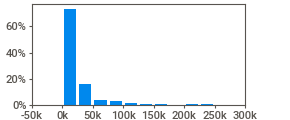
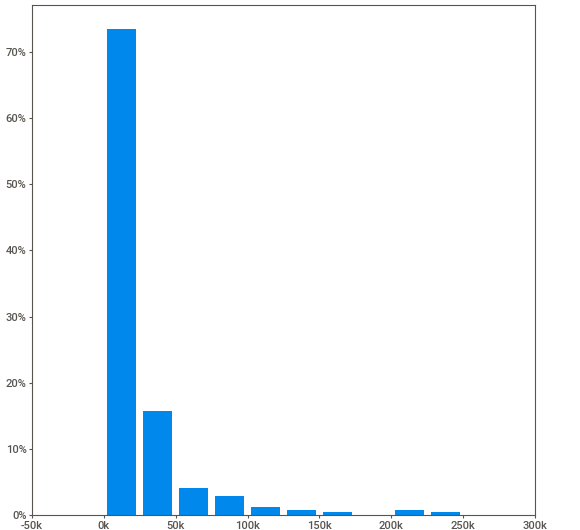
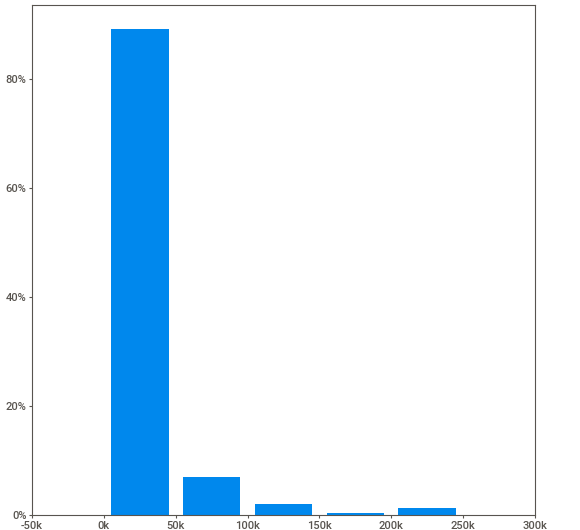
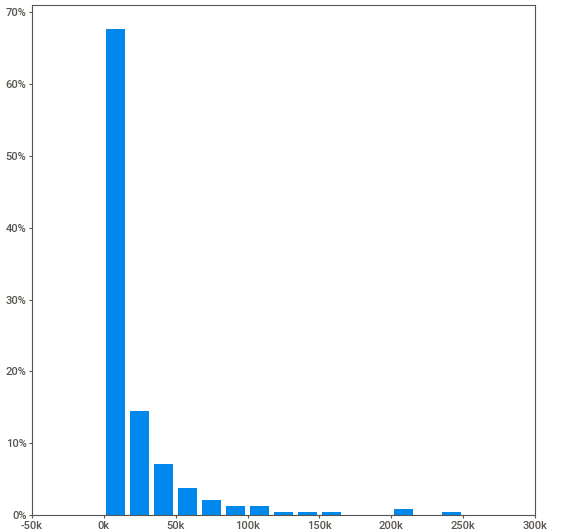
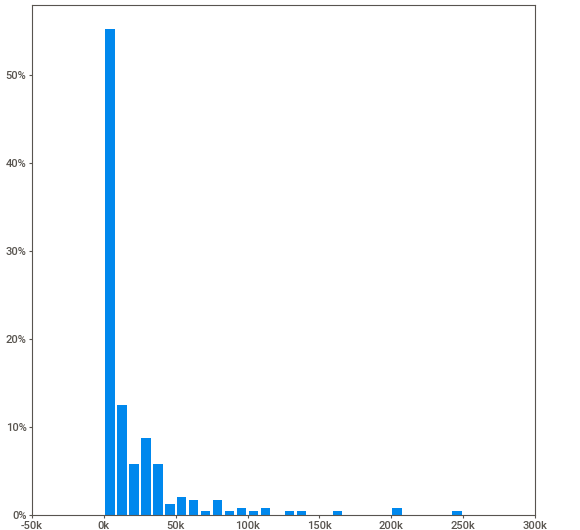
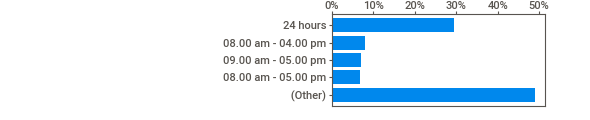
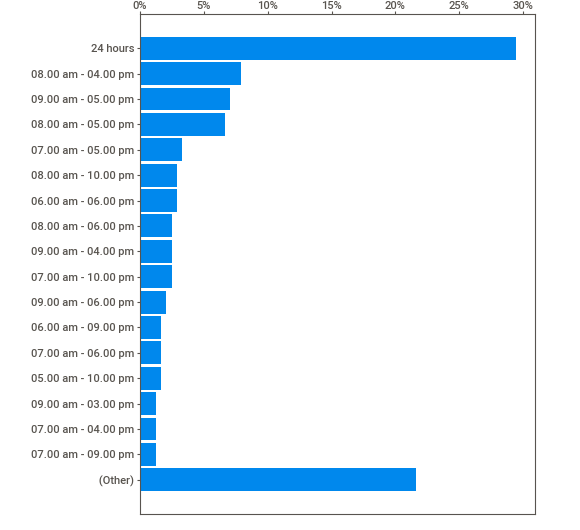
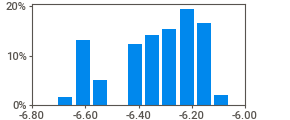
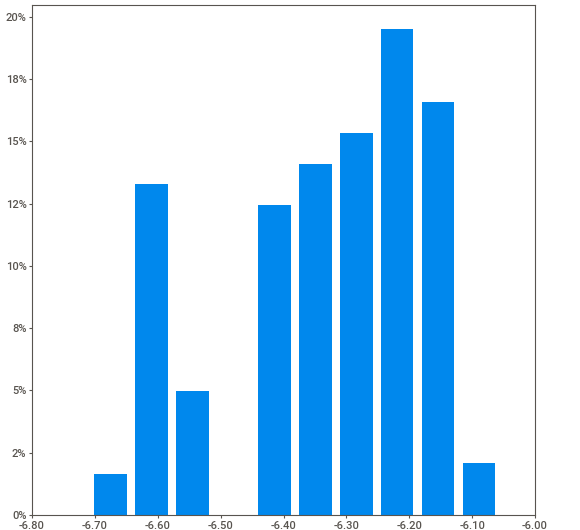
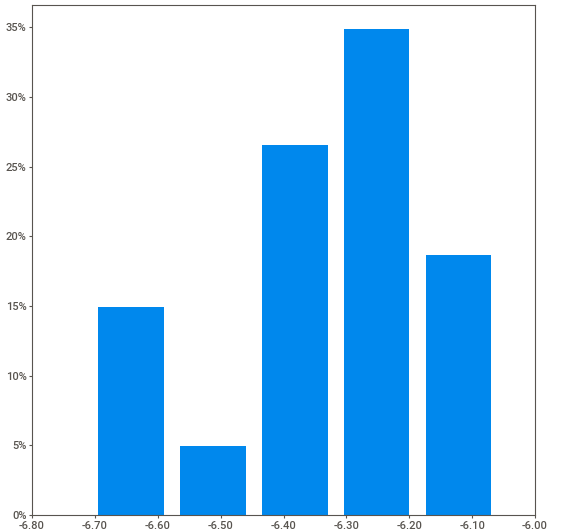
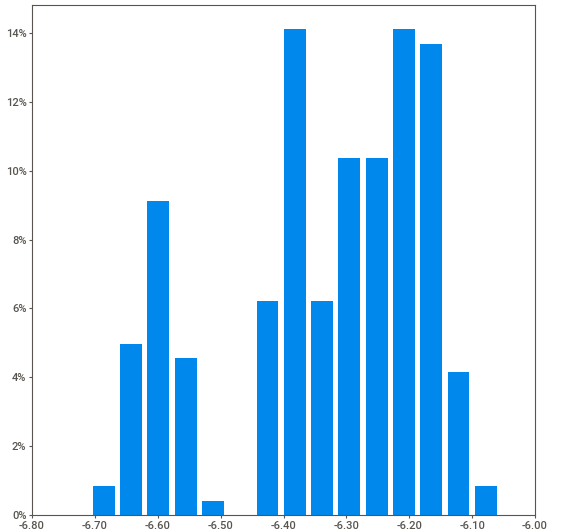
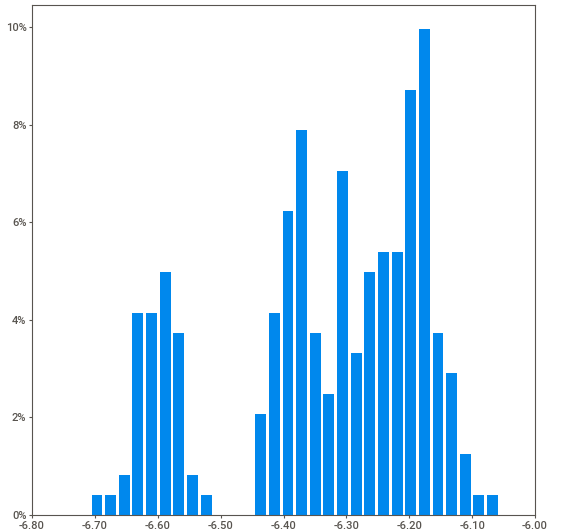
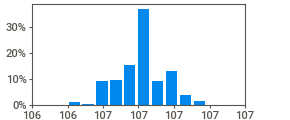
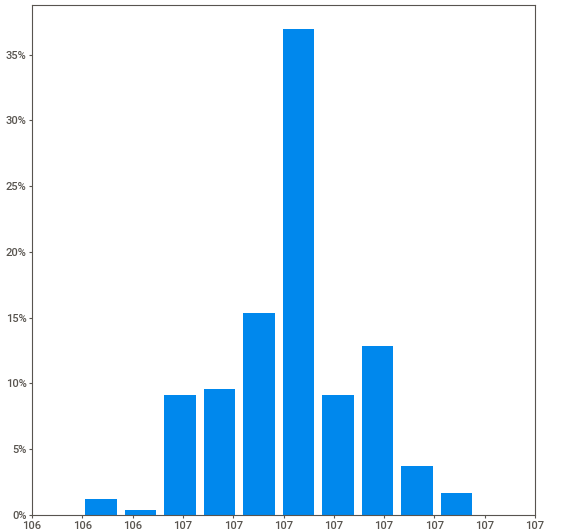
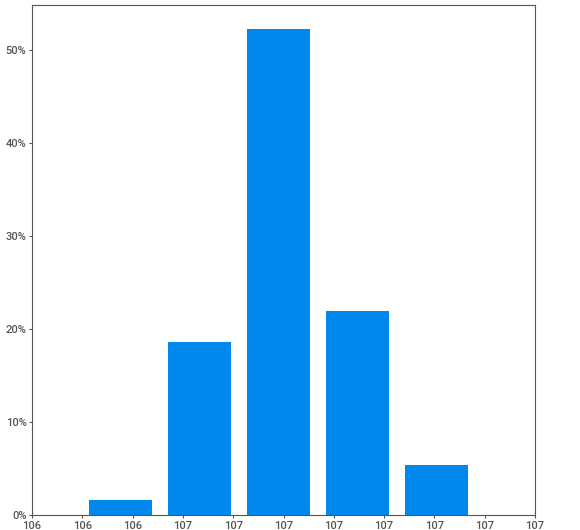
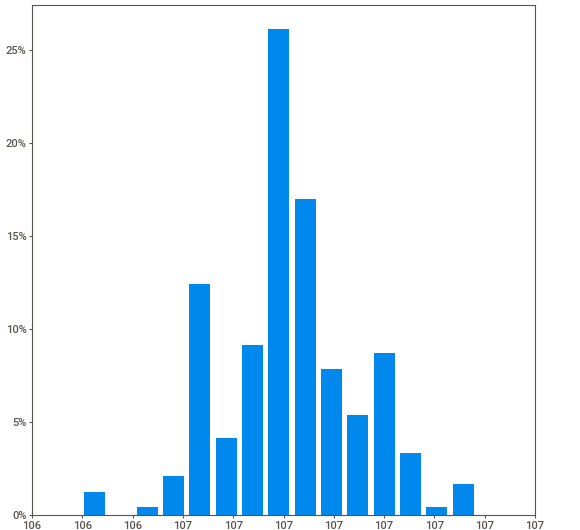
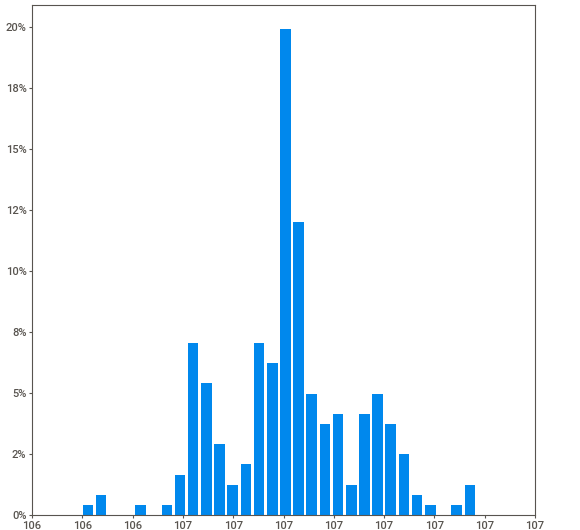
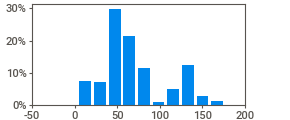
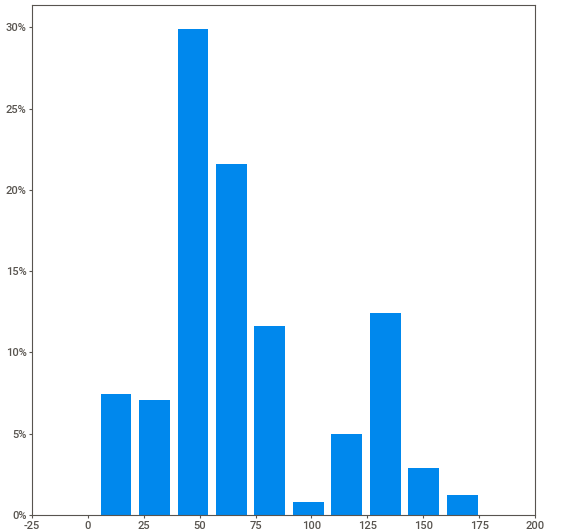
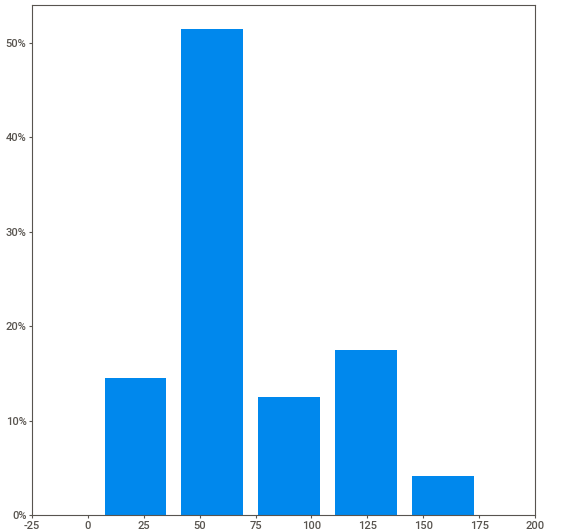
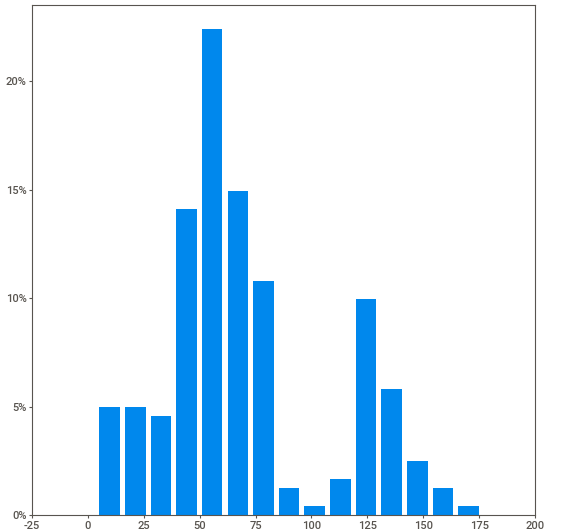
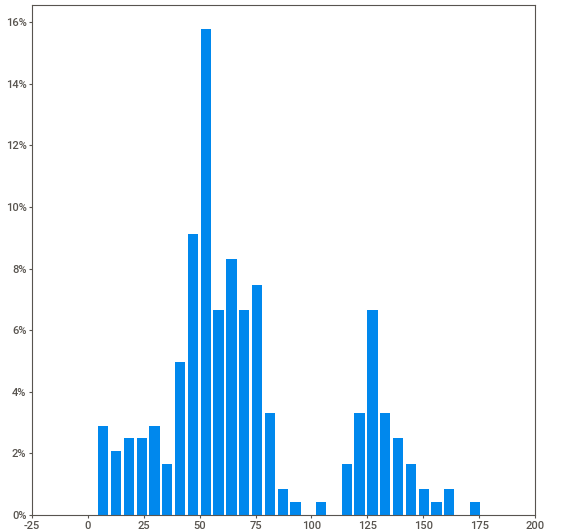
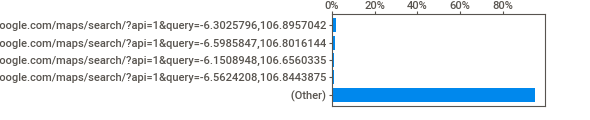
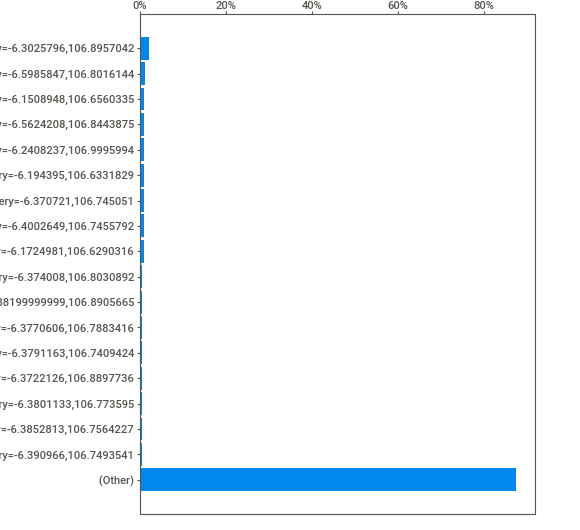
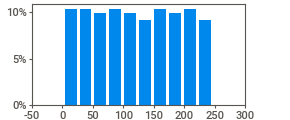
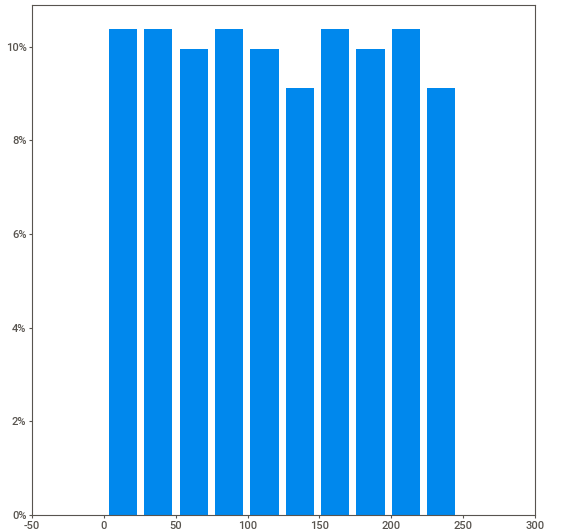
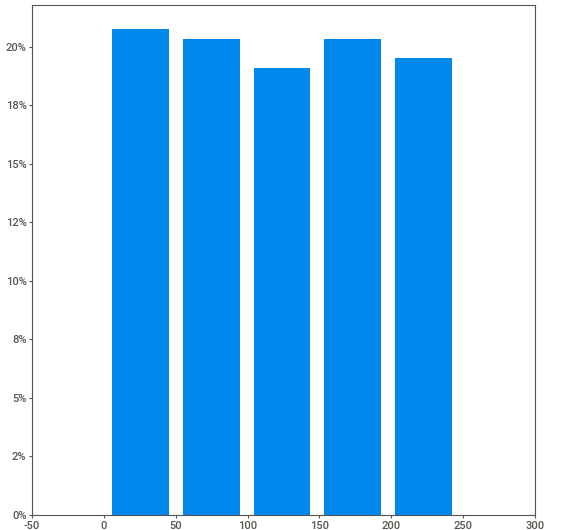
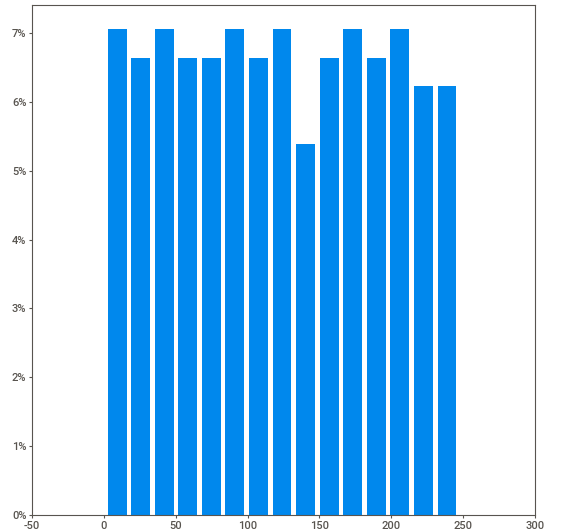
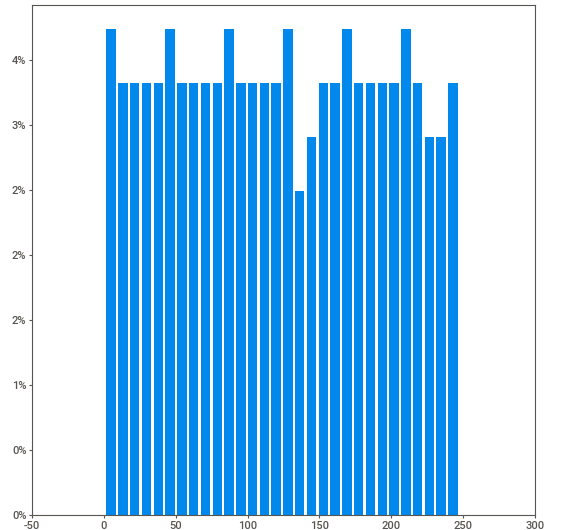
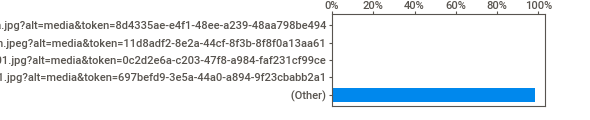
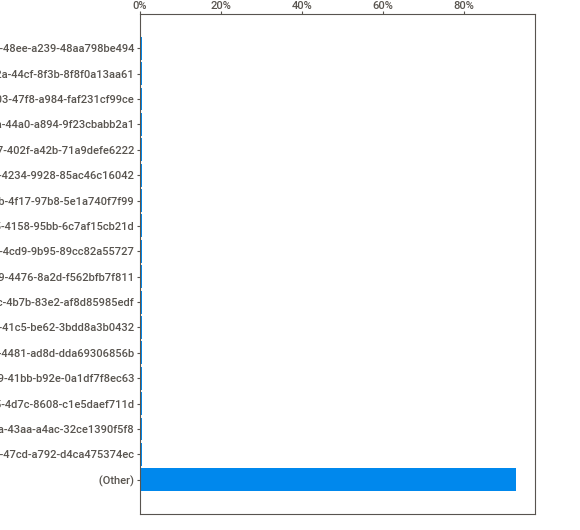
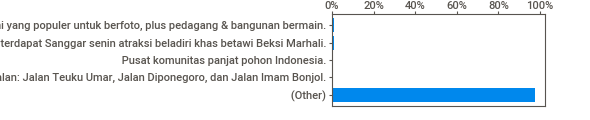
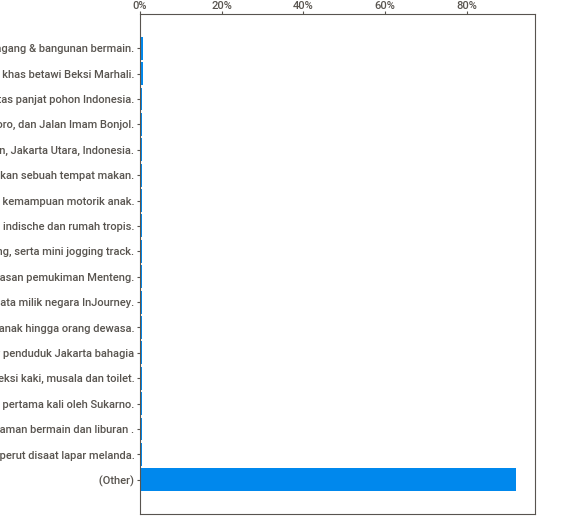
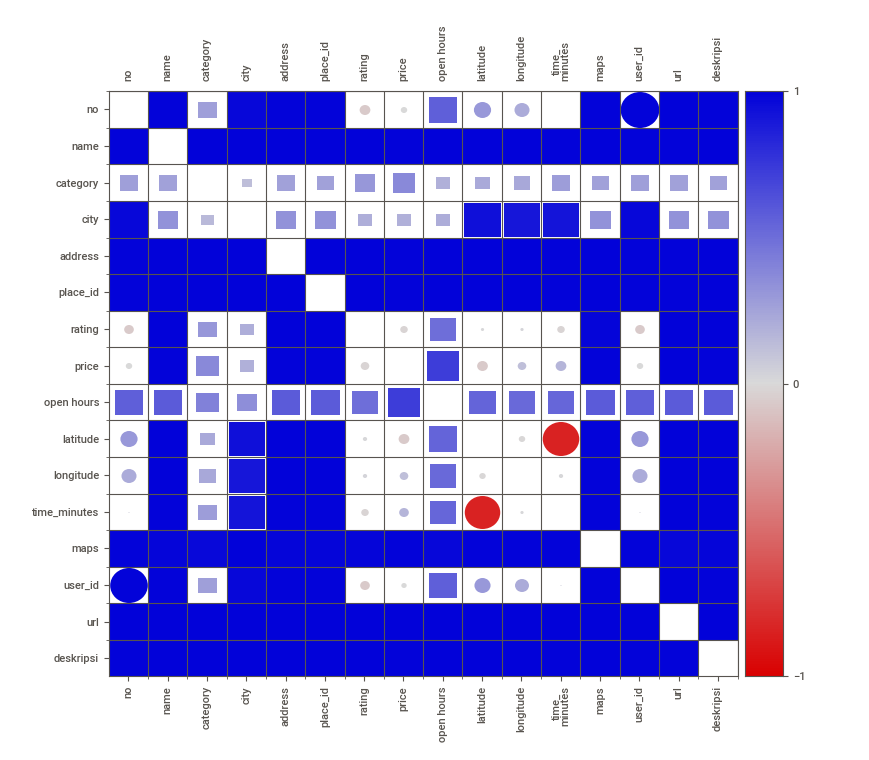
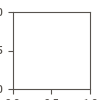

In [ ]:
## Code ini membantu untuk melihat telaah data pada masing-masing variabel pada data tempat wisata
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([df, 'laporan_penelaahan_data'])
report.show_notebook()
report